In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

from google.colab import drive
drive.mount ('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Load the data
df = pd.read_csv("/content/drive/My Drive/pythonsourcecode/datafiles/diabetes.csv")


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
### List the columns along with its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
### Summary of statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
### Display the number of zero values per columns
print("---Count zero values per column---")

for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI"]:
    print("{}: {}".format( col, df[col].value_counts()[0] ))


### Print the percentage of rows with zero values
print("\n---Rows with zero values in %---")

print("% of rows with zero values in all columns listed above:",
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
          (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) * 100)

print("% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI':",
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) |
          (df["BMI"]==0)].shape[0] / df.shape[0]) * 100)


---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zero values in %---
% of rows with zero values in all columns listed above: 30.729166666666668
% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI': 5.729166666666666


In [ ]:
### Determine correlation between variables
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


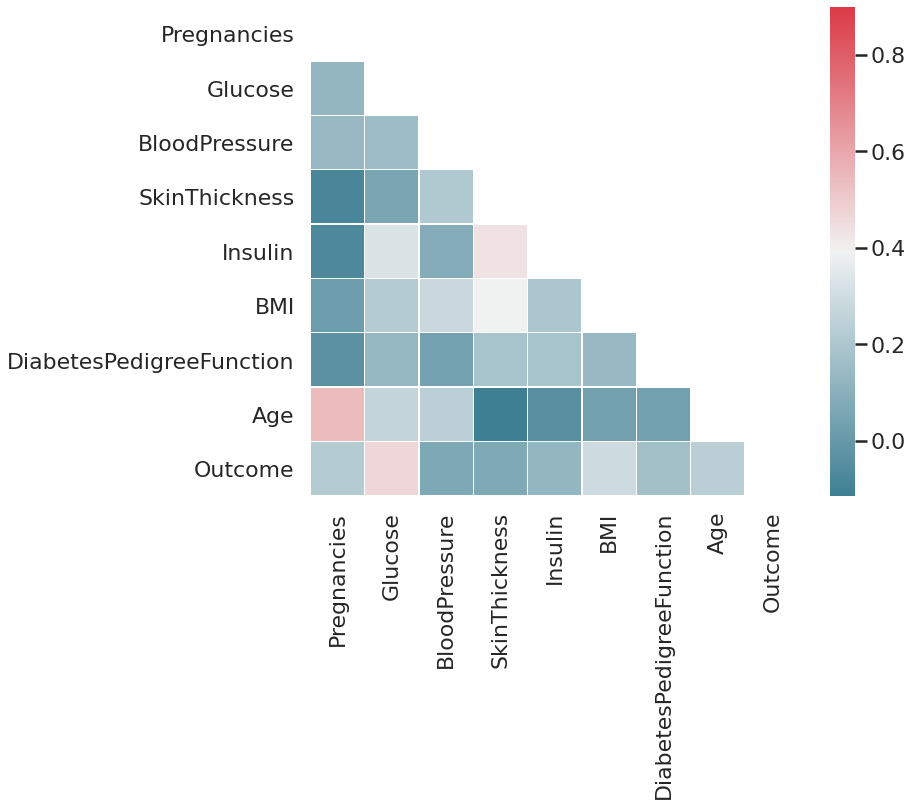

In [ ]:
### Visualize Correlation

## Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)


----- Outcome vs Pregnancies-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


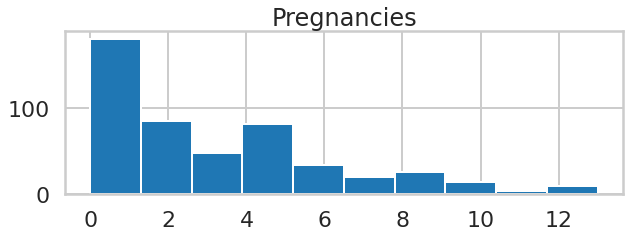

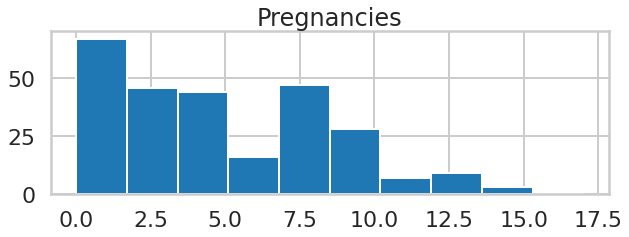

In [ ]:
### Function to plot histogram
def histplt(col):
    print("----- Outcome vs {}-----".format(col))
    print(df[["Outcome", col]].groupby("Outcome").hist(figsize=(10,3)))

### Plot histogram for Outcome vs Pregnancies
histplt("Pregnancies")


----- Outcome vs Glucose-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


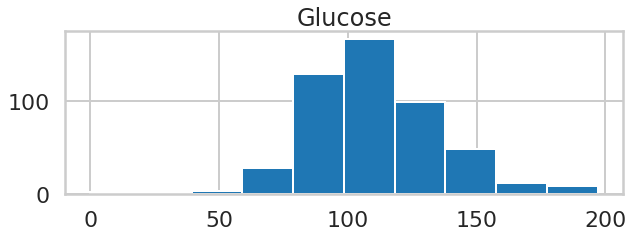

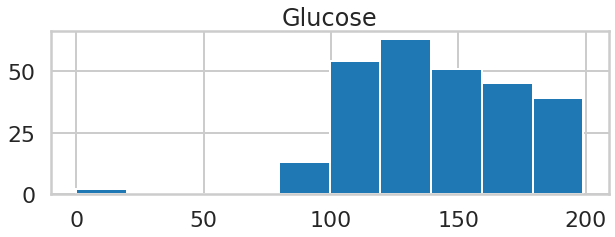

In [ ]:
### Plot histogram for Outcome vs Glucose
histplt("Glucose")


----- Outcome vs BloodPressure-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


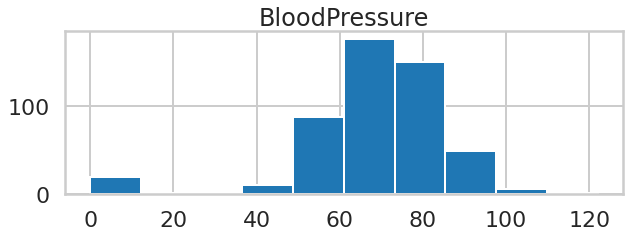

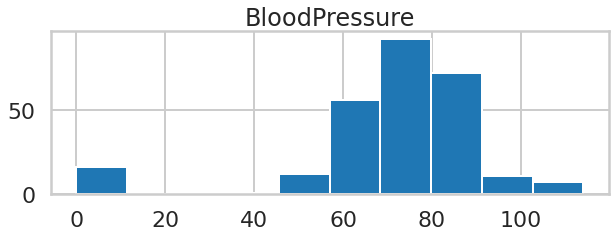

In [ ]:
### Plot histogram for Outcome vs BloodPressure
histplt("BloodPressure")


----- Outcome vs SkinThickness-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


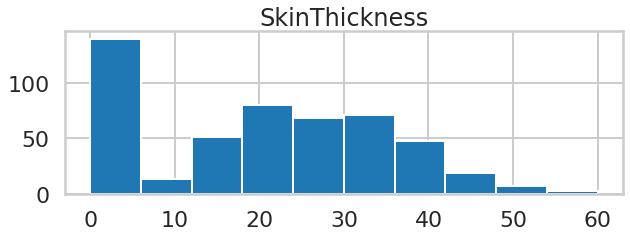

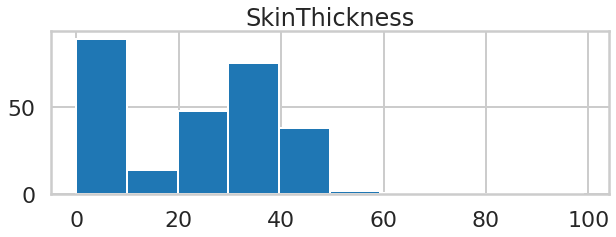

In [ ]:
### Plot histogram for Outcome vs SkinThickness
histplt("SkinThickness")


----- Outcome vs Insulin-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


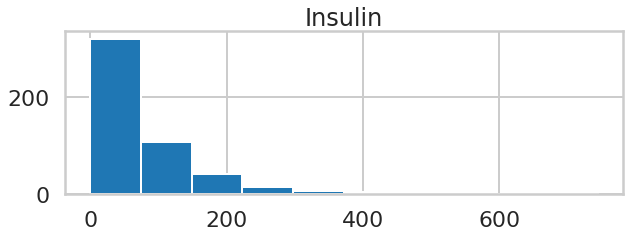

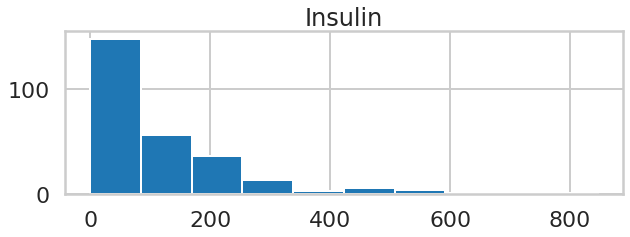

In [ ]:
### Plot histogram for Outcome vs Insulin
histplt("Insulin")


----- Outcome vs BMI-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


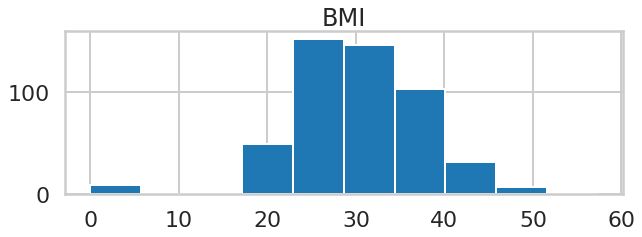

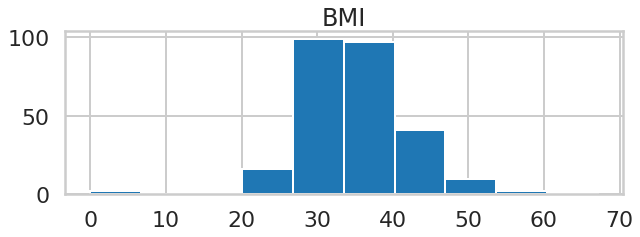

In [ ]:
### Plot histogram for Outcome vs BMI
histplt("BMI")


----- Outcome vs DiabetesPedigreeFunction-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


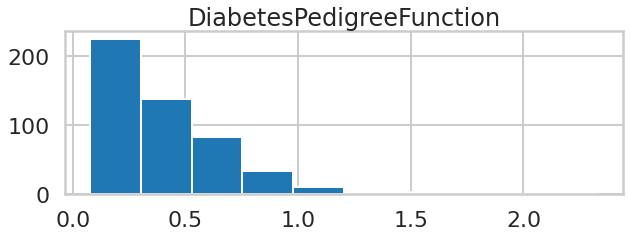

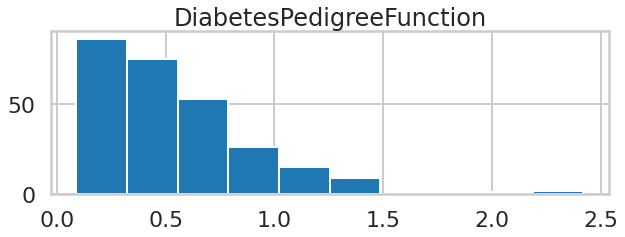

In [ ]:
### Plot histogram for Outcome vs DiabetesPedigreeFunction
histplt("DiabetesPedigreeFunction")


----- Outcome vs Age-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


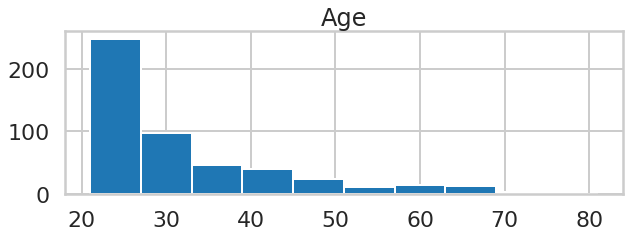

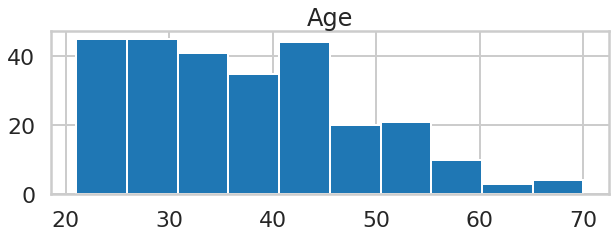

In [ ]:
### Plot histogram for Outcome vs Age
histplt("Age")


In [ ]:
### Check how balanced / imbalanced the data is
df["Outcome"].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
### Create new dataframe wherein the unwanted rows are not included
df_rem = df[ (df["Glucose"]!=0) & (df["BloodPressure"]!=0) & (df["BMI"]!=0) ]

### Check the new dataframe
print("Size of dataframe:", df_rem.shape)
df_rem.head()


Size of dataframe: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
### Check minimum values of the new dataframe
df_rem.describe().loc["min"]


Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                0.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

In [ ]:
### Separate rows that have zero value in SkinThickness from the rows that have value > 0
df_impute = df_rem[df_rem["SkinThickness"]!=0]
df_0 = df_rem[df_rem["SkinThickness"]==0]

### Use Linear Regression for imputation
## Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

## Fit the dataframe with SkinThickness > 0 on linreg
linreg.fit(df_impute.drop(["SkinThickness", "Outcome"], axis=1), df_impute["SkinThickness"])

## Get the new values of SkinThickness
df_0["SkinThickness"] = linreg.predict(df_0.drop(["SkinThickness","Outcome"], axis=1))

### Merge the imputed datas, then check
df_impute = df_impute.append(df_0)
df_impute.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.024005,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.683955,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.014105,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,35.004675,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
### Seaprate the predictors from the target variable
X = df_impute.drop(["Outcome"], axis=1)
y = df_impute["Outcome"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))


Size of x (predictors):	(724, 8)
Size of y (target):	(724,)


In [ ]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))


Size of x_train: (506, 8) 	 Size of x_test: (218, 8) 
Size of y_train: (506,) 	 Size of y_test: (218,)


In [ ]:
print(y_train.value_counts(), '\n', y_test.value_counts())


0    332
1    174
Name: Outcome, dtype: int64 
 0    143
1     75
Name: Outcome, dtype: int64


In [ ]:
### Instantiate the Standard Scaler
scaler = StandardScaler()

### Fit the scaler to the training set
scaler.fit(X_train)

### Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)


In [ ]:
### Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


In [ ]:
### Initialized for easy plotting of confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    plt.figure(figsize = (10,7))
    plt.title(title)

    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size


In [ ]:
### Instantiate the Algorithm
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
### Predict on the test set
logreg_pred = logreg.predict(X_test_scaled)


In [ ]:
### Get performance metrics
logreg_score = metrics.accuracy_score(y_test, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test, logreg_pred)))
print("Accuracy score:", logreg_score)


Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       143
           1       0.75      0.63      0.68        75

    accuracy                           0.80       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.79      0.80      0.79       218

Accuracy score: 79.81651376146789


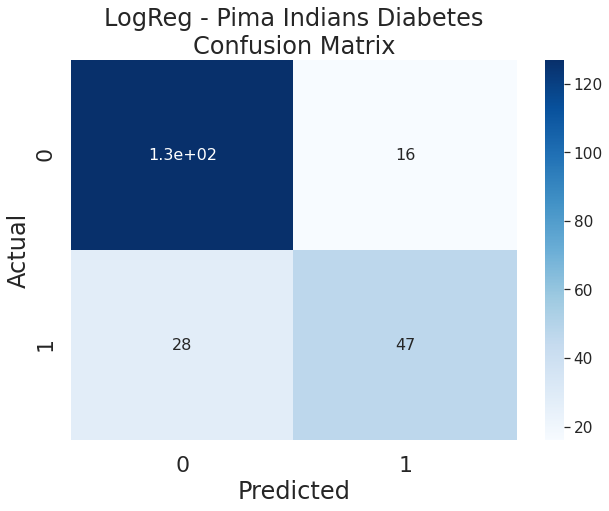

In [ ]:
### Plot the confusion matrix
confmatrix(logreg_pred, "LogReg - Pima Indians Diabetes\nConfusion Matrix")


In [ ]:
### Perform 10-fold cross-validation
logreg_cv = np.mean(cross_val_score(logreg, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", logreg_cv)


10-Fold Cross-Validation score for KNN fit in Regular Training Set: 76.09969558599695


In [ ]:
### Instantiate algorithm
rf = RandomForestClassifier()

### Fit the model to the data
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
### Predict on the test set
rf_pred = rf.predict(X_test_scaled)


In [ ]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", rf_score)


Classification report for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       143
           1       0.72      0.67      0.69        75

    accuracy                           0.80       218
   macro avg       0.78      0.77      0.77       218
weighted avg       0.80      0.80      0.80       218

Accuracy score: 79.81651376146789


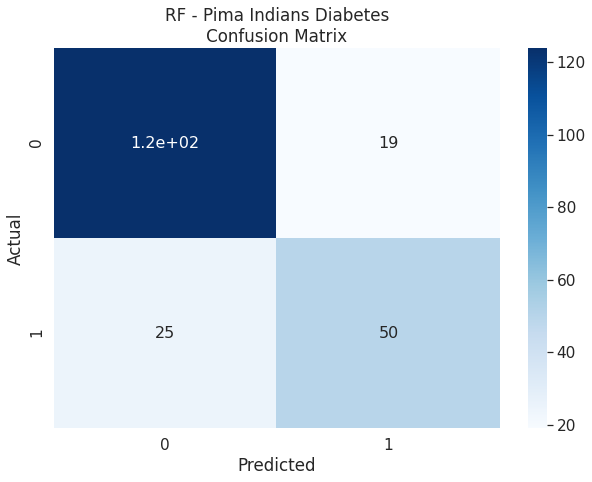

In [ ]:
### Plot the confusion matrix
confmatrix(rf_pred, "RF - Pima Indians Diabetes\nConfusion Matrix")


In [ ]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", rf_cv)


10-Fold Cross-Validation score for KNN fit in Regular Training Set: 77.76445966514459


In [ ]:
df_results = pd.DataFrame.from_dict({
    'Accuracy Score':{'Logistic Regression':logreg_score,'Random Forest':rf_score},
    'Cross-Validation Score':{'Logistic Regression':logreg_cv,'Random Forest':rf_cv}
    })
df_results


,Accuracy Score,Cross-Validation Score
Logistic Regression,79.816514,76.099696
Random Forest,79.816514,77.764460
